Graph plotting:


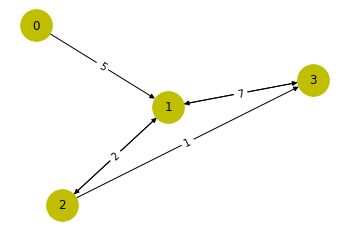

Origin node: 2
Goal node: 0
The minimum distance path from 2 to 0 is: 0 <-- -1 <-- 2

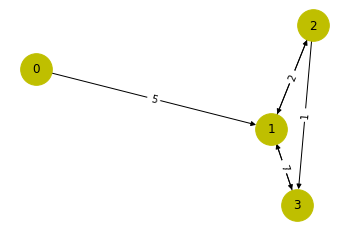

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#Graph Adjacency Matrix
Adj = np.asarray([[0, 5, 0, 0],
                  [0, 0, 2, 7],
                  [0, 2, 0, 1],
                  [0, 7, 0, 0]]) #Zero means no edge between nodes

#Plot the directed graph
G = nx.DiGraph()

N = Adj.shape[0]
for i in range(N):
  G.add_node(i)
  
for i in range(N):
  for j in range(N):
    if Adj[i,j] > 0:
      G.add_edges_from([(i, j)], weight=Adj[i,j])

print("Graph plotting:")

pos=nx.spring_layout(G) 
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)]) 
nx.draw_networkx(G,pos,edge_labels=edge_labels, node_size = 1000, node_color = 'y') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()

#Dijkstra algorithm
distance = np.zeros(N) 
visited = np.ones(N) 
origin = int(input("Origin node: "))
goal = int(input("Goal node: ")) 

visited[origin] = 0

pred = np.zeros(N)
pred[origin] = origin

for j in range(N):
  if Adj[origin,j] == 0 and origin != j: 
    distance[j] = 10e10
    pred[j] = -1
  else:
    distance[j] = Adj[origin,j]
    pred[j] = origin

while(np.sum(visited) > 0): 
  temp = np.copy(distance) 
  temp[visited == 0] = 10e10
  vmin = np.argmin(temp)
  visited[vmin] = 0
  for j in range(N):
    if Adj[vmin,j] > 0 and distance[j]>distance[vmin]+Adj[vmin,j]: 
      distance[j] = distance[vmin]+Adj[vmin,j]
      pred[j] = vmin

pred = pred.astype(int) #Minimum distance path from origin node to the others

#Plot path
previous = pred[goal]
path = [(previous, goal),(goal, previous)]
print("The minimum distance path from "+str(origin)+" to "+str(goal)+" is: "+str(goal)+" <-- "+str(previous), end="")
while(previous != origin):
  path.append((previous, pred[previous]))
  path.append((pred[previous], previous))
  previous = pred[previous]
  print(" <-- "+str(previous), end="")

edge_colors = ['black' if not edge in path else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
nx.draw_networkx(G,pos,edge_labels=edge_labels, node_size = 1000, node_color = 'y', edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()